In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
cc_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cc_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
print(cc_data.Quarter[1][3:])
print(cc_data.Quarter[1][:2])

86
Q2


In [4]:
year = []
month = []
for i in cc_data['Quarter']:
    year.append('19'+i[3:])
    if i[:2] == 'Q1':
        month.append('jan')
    elif i[:2] == 'Q2':
        month.append('apr')
    elif i[:2] == 'Q3':
        month.append('jul')
    else:
        month.append('oct')

data = cc_data.copy()
data['year'] = year
data['month'] = month
data['t'] = range(1, len(data)+1)
data['t_squared'] = data['t']**2
data.head()

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986,jan,1,1
1,Q2_86,2244.960999,1986,apr,2,4
2,Q3_86,2533.804993,1986,jul,3,9
3,Q4_86,2154.962997,1986,oct,4,16
4,Q1_87,1547.818996,1987,jan,5,25


In [5]:
data

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986,jan,1,1
1,Q2_86,2244.960999,1986,apr,2,4
2,Q3_86,2533.804993,1986,jul,3,9
3,Q4_86,2154.962997,1986,oct,4,16
4,Q1_87,1547.818996,1987,jan,5,25
5,Q2_87,2104.411995,1987,apr,6,36
6,Q3_87,2014.362999,1987,jul,7,49
7,Q4_87,1991.746998,1987,oct,8,64
8,Q1_88,1869.049999,1988,jan,9,81
9,Q2_88,2313.631996,1988,apr,10,100


In [6]:
data.shape

(42, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   year       42 non-null     object 
 3   month      42 non-null     object 
 4   t          42 non-null     int64  
 5   t_squared  42 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB


In [8]:
data['year']= pd.to_datetime(data['year'])

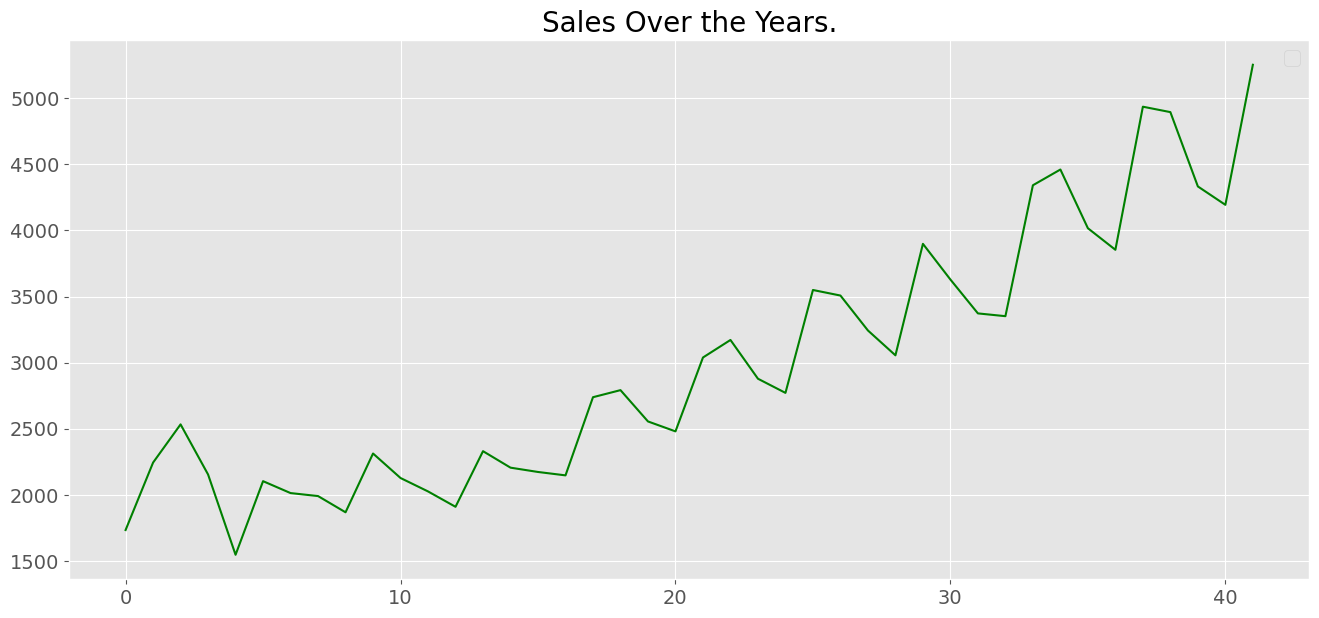

In [9]:
plt.style.use('ggplot')
plt.title("Sales Over the Years.",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels ='Sales', fontsize=14)
data['Sales'].plot(figsize=(16,7),c='g');

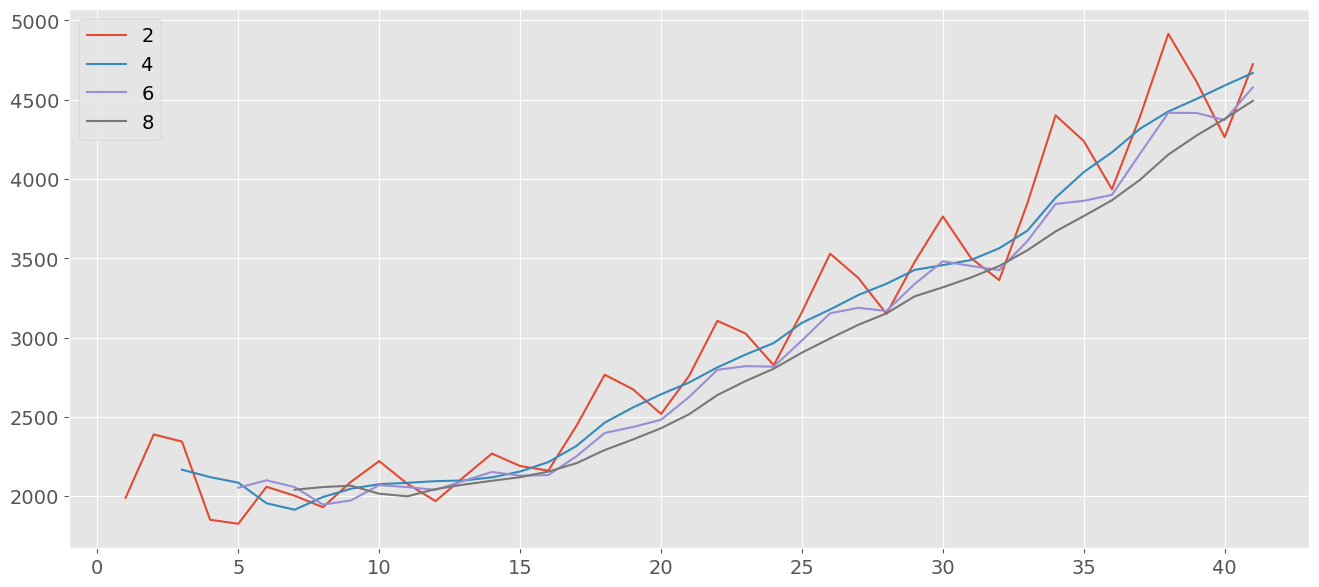

In [10]:
#Moving Average

for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i),figsize=(16,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=(14));

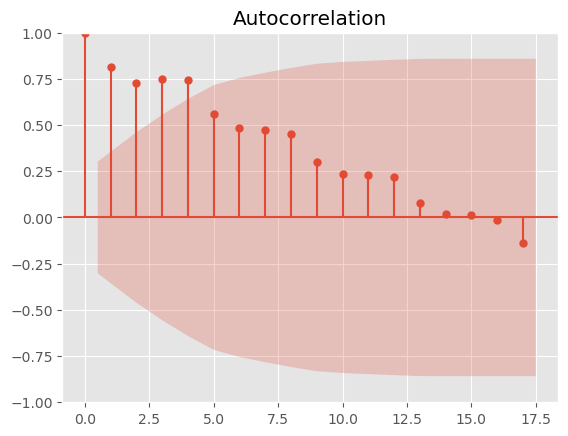

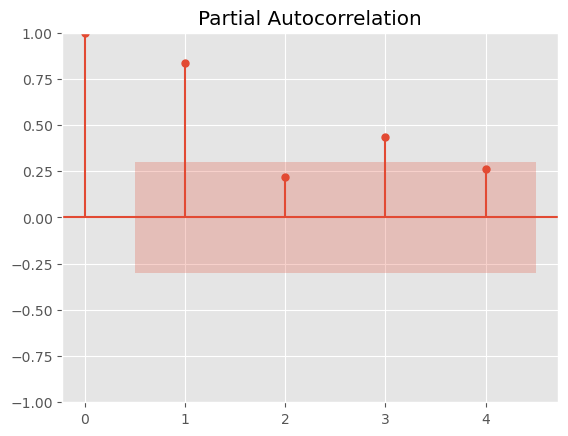

In [11]:
tsa_plots.plot_acf(data['Sales'])
tsa_plots.plot_pacf(data['Sales'], lags = 4)
plt.show()

In [12]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [13]:
changes = cc_data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
cc_data['quater'] = pd.to_datetime(changes).dt.strftime('%b-%Y')
cc_data= cc_data.drop(['Quarter'], axis=1)
cc_data.reset_index(inplace=True)
cc_data['quater'] = pd.to_datetime(cc_data['quater'])
cc_data = cc_data.set_index('quater')
cc_data.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


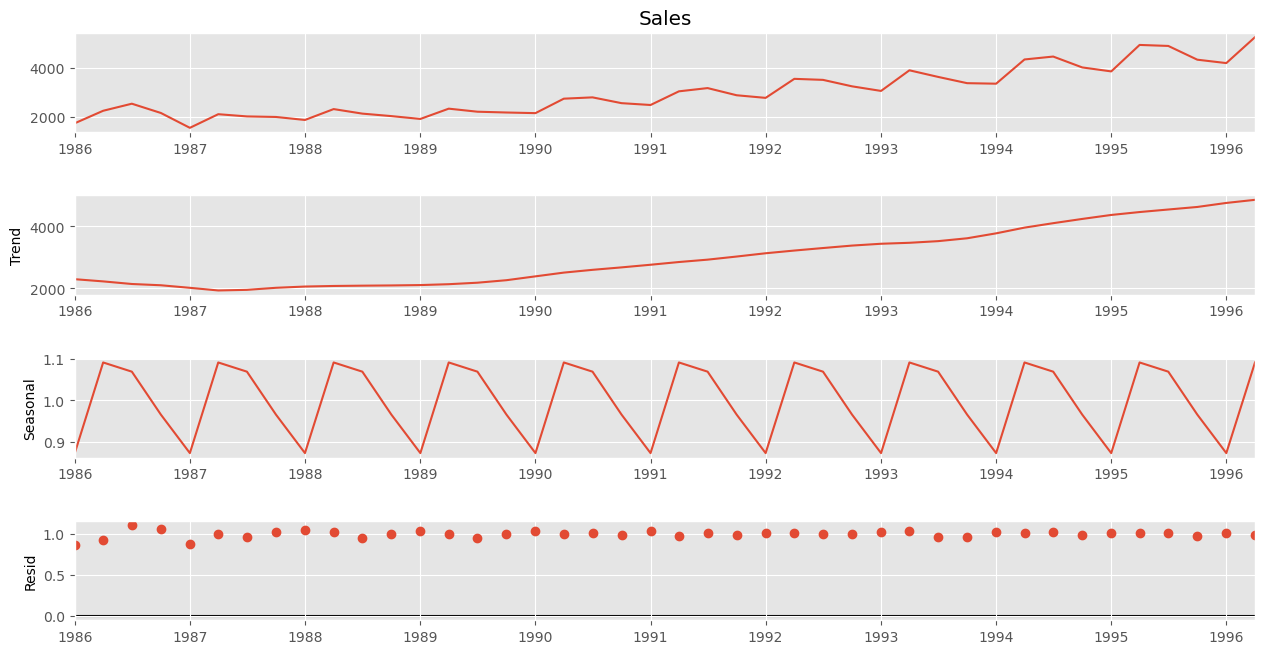

In [14]:
seasonal_decompose(cc_data['Sales'])

# Arima Model


In [15]:
X = data['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Fri, 24 Nov 2023   AIC                            360.163
Time:                        12:23:34   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

In [17]:
model_fit.forecast(1)

array([3130.13256489])

In [18]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs));

predicted=3130.132565, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837511, expected=3629.000000
predicted=3332.746318, expected=3373.000000
predicted=3258.573065, expected=3352.000000
predicted=4081.006044, expected=4342.000000
predicted=3955.784554, expected=4461.000000
predicted=4146.277755, expected=4017.000000
predicted=3958.436338, expected=3854.000000
predicted=4701.652907, expected=4936.000000
predicted=4990.060379, expected=4895.000000
predicted=4390.352733, expected=4333.000000
predicted=4190.868308, expected=4194.000000
predicted=5176.966207, expected=5253.000000


In [19]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34280.205


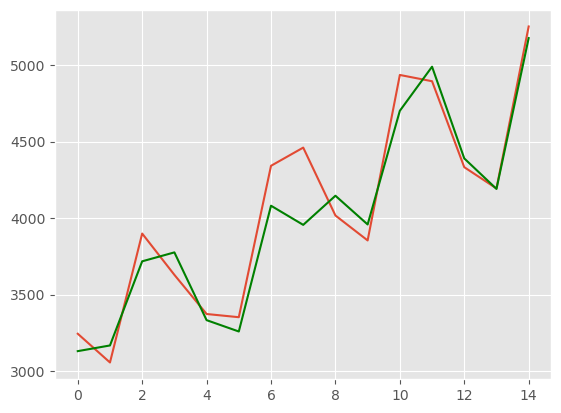

In [20]:
plt.plot(test)
plt.plot(predictions, color='g')
plt.show()

# Building and comparing multiple models

In [21]:
data.head()

,Quarter,Sales,year,month,t,t_squared
0,Q1_86,1734.827000,1986-01-01,jan,1,1
1,Q2_86,2244.960999,1986-01-01,apr,2,4
2,Q3_86,2533.804993,1986-01-01,jul,3,9
3,Q4_86,2154.962997,1986-01-01,oct,4,16
4,Q1_87,1547.818996,1987-01-01,jan,5,25


In [22]:
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

In [23]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data['log_sales'] =  np.log(data["Sales"])

In [24]:
final_data = data.drop(['year','month'],axis=1)

In [25]:
final_data.head()

,Quarter,Sales,t,t_squared,Quarters,Year,Q1,Q2,Q3,Q4,log_sales
0,Q1_86,1734.827000,1,1,Q1,86,1,0,0,0,7.458663
1,Q2_86,2244.960999,2,4,Q2,86,0,1,0,0,7.716443
2,Q3_86,2533.804993,3,9,Q3,86,0,0,1,0,7.837477
3,Q4_86,2154.962997,4,16,Q4,86,0,0,0,1,7.675529
4,Q1_87,1547.818996,5,25,Q1,87,1,0,0,0,7.344602


In [26]:
Train, Test = final_data.head(32),final_data.tail(10)

In [27]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

In [28]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

3954.313201255718

In [29]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554073874

In [30]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [31]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Q1','Q2','Q3']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.35107711287395

In [32]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2495.3224714772023

In [33]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test[['t','Q1','Q2','Q3']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['log_sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

3947.098574401521

In [34]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
2,rmse_Quad,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,2495.322471
6,rmse_Mult_add_sea,3947.098574
1,rmse_Exp,3954.313201


# Building final model

In [35]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [36]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=final_data).fit()
pred_final = pd.Series(final_model.predict(final_data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(final_data['Sales'], pred_final)
rmse_final_model

159.05522576522478

In [37]:
pred_df = pd.DataFrame({'Actual' : final_data.Sales, 'Predicted' : pred_final})

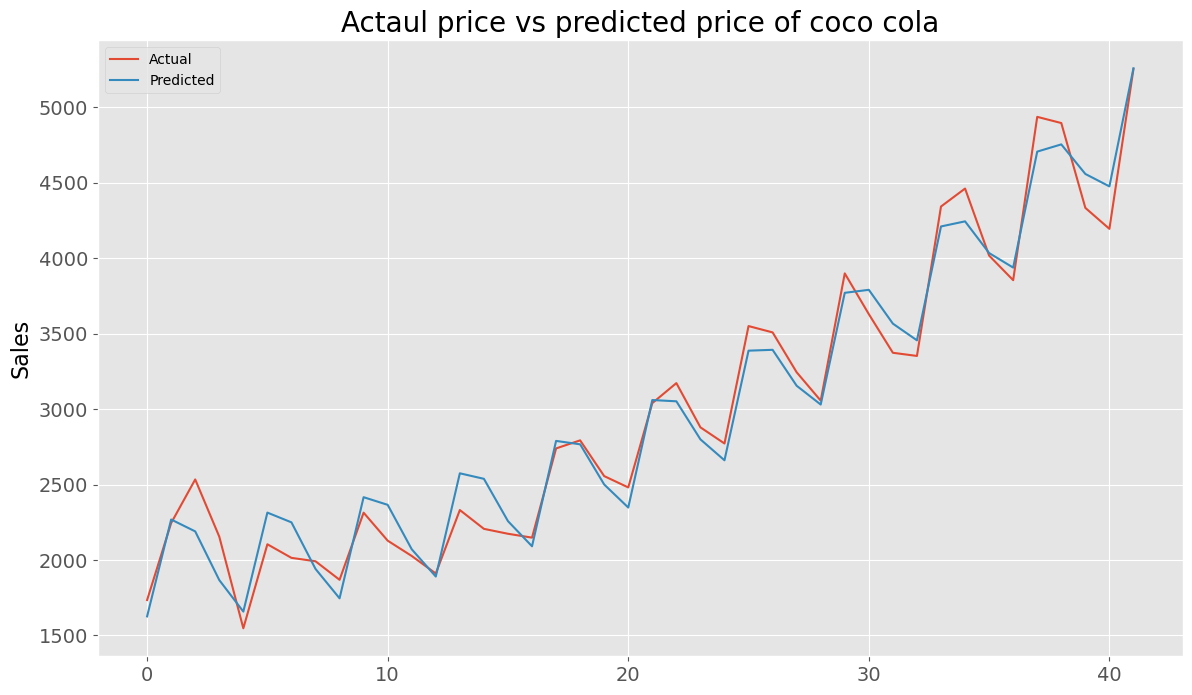

In [38]:
#plotting actual vs forecasted
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Actaul price vs predicted price of coco cola', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.plot(final_data['Sales'],label='Actual')
plt.plot(pred_df['Predicted'],label='Predicted')
plt.legend();